Plot1. Other incomes over ave compensation

import data from 'Faculty Compensation_clean.csv'

In [1]:
import pandas as pd
f=pd.read_csv('Faculty Compensation_clean.csv')
f=f.drop(['Unnamed: 0'],axis=1)

In [2]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 9 columns):
university           3808 non-null object
Ave. Salary          3808 non-null int64
Avg. Change          3264 non-null float64
Count                3807 non-null float64
Avg. Compensation    3157 non-null float64
Salary Equity        3446 non-null float64
position             3808 non-null object
State                3808 non-null object
Category             3808 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 267.8+ KB


Only work on rowdata with complete information.

In [3]:
def complete(row): #return no value is null
    for i in row:
        if pd.isnull(i):
            return False
    return True

f['Complete']=f.apply(complete, axis=1)
f=f.loc[f['Complete']==True, :]

In [4]:
f.info()
f.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 0 to 3807
Data columns (total 10 columns):
university           2907 non-null object
Ave. Salary          2907 non-null int64
Avg. Change          2907 non-null float64
Count                2907 non-null float64
Avg. Compensation    2907 non-null float64
Salary Equity        2907 non-null float64
position             2907 non-null object
State                2907 non-null object
Category             2907 non-null object
Complete             2907 non-null bool
dtypes: bool(1), float64(4), int64(1), object(4)
memory usage: 229.9+ KB


,university,Ave. Salary,Avg. Change,Count,Avg. Compensation,Salary Equity,position,State,Category,Complete
0,Abilene Christian University,89000,1.2,66.0,107300.0,90.4,P,TEXAS,Master,True
1,Abilene Christian University,71400,0.4,85.0,87800.0,89.6,AP,TEXAS,Master,True
2,Abilene Christian University,67400,2.5,55.0,81600.0,96.1,aP,TEXAS,Master,True
3,Abilene Christian University,54400,1.5,44.0,71300.0,100.0,I,TEXAS,Master,True
4,Adams State University,65600,-0.3,33.0,67700.0,94.8,P,COLORADO,Baccalaureate,True


Other_Income is the compensation - salary

In [5]:
f['Other_Income']=f['Avg. Compensation']-f['Ave. Salary']

In [6]:
f['Ratio']=f['Other_Income']/f['Avg. Compensation']

Calculate the total compensation and Other_income grouped by category
Normalize the data by mean and std.
Plot the bar graph

In [16]:
Cat_ratio=f.groupby(['Category'])['Ratio'].mean()
Cat_comp=f.groupby(['Category'])['Avg. Compensation'].mean()
Cat=pd.concat([Cat_comp,Cat_ratio], axis=1)
Cat.columns=['Compensation','Other income']
Cat=(Cat-Cat.mean())/Cat.std()

Bar graph for ratio of other incomes and compensation grouped by school category

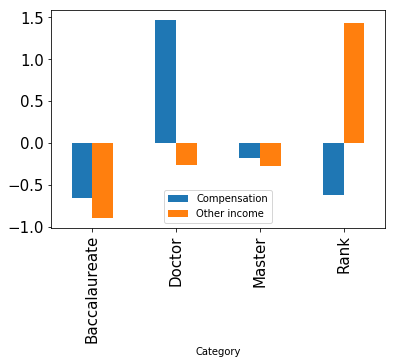

In [17]:
plot1_1=Cat.plot(kind='bar',fontsize=15)

Bar graph for ratio of incomes and compensation grouped by position

In [18]:
Pos_ratio=f.groupby(['position'])['Ratio'].mean()
Pos_comp=f.groupby(['position'])['Avg. Compensation'].mean()
Pos=pd.concat([Pos_comp,Pos_ratio], axis=1)
Pos.columns=['Compensation','Other income']
Pos=(Pos-Pos.mean())/Pos.std()

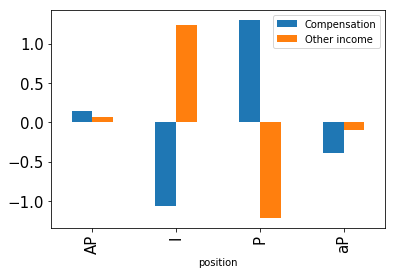

In [19]:
plot1_2=Pos.plot(kind='bar',fontsize=15)